In [2]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv

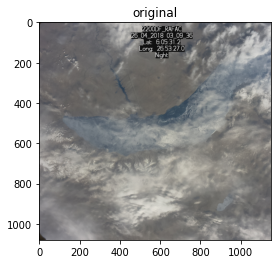

In [23]:
img = cv.imread('./images/train14.jpg')
img = img[:, 350:1500]

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('original')
plt.show()

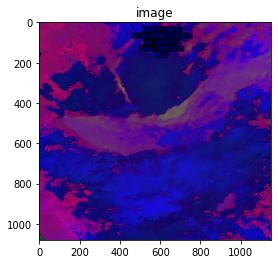

In [24]:
img = cv.GaussianBlur(img, (5,5), 0)

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2HSV))
plt.title('image')
plt.show()

In [25]:
white = np.array([255,255,255])
lowerBound = np.array([30,10,30])

In [26]:
mask = cv.inRange(hsv, lowerBound, white)

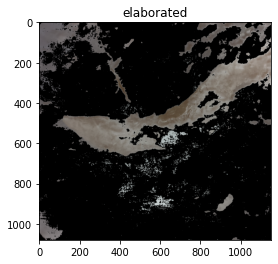

In [27]:
res = cv.bitwise_and(img, img, mask=mask)

plt.imshow(cv.bitwise_and(img, img, mask=mask))
plt.title('elaborated')
plt.show()